<a href="https://colab.research.google.com/github/Golden-Adreet/ODE_Solving_Methodes/blob/master/RK4_methode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
def f(x,y,lam):
    return -lam*y

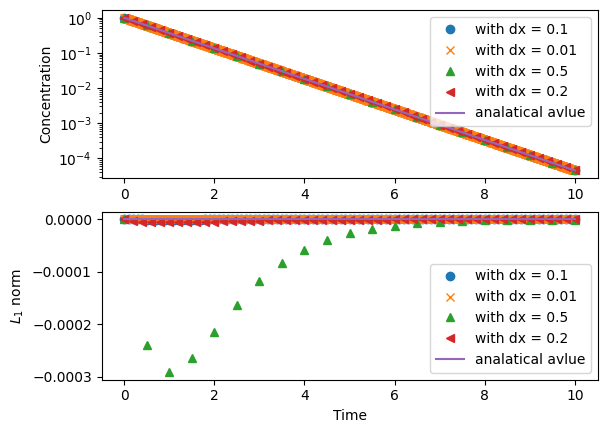

In [ ]:
xi = 0;xf = 10
lam = 1.0
yi = 1

H = [0.1,0.01,0.5,0.2]
for h in H:
  a = f'RK4_dx_{h}.dat'
  fp = open(a,'w')
  x = xi;y=yi
  s = int((xf-xi)/h)
  fp.write(f'{x},{y}\n')
  for _ in range(s):
    a = h*f(x,y,lam)
    b = h*f(x+0.5*h,y+0.5*a,lam)
    c = h*f(x+0.5*h,y+0.5*b,lam)
    d = h*f(x+h,y+c,lam)
    y+=(a + 2*b + 2*c + d)/6.0
    x+=h
    fp.write(f'{x},{y}\n')
  fp.close()
a = np.loadtxt(f'RK4_dx_0.1.dat',delimiter = ',')
a1,b1 = a[:,0],a[:,1]
a = np.loadtxt(f'RK4_dx_0.01.dat',delimiter = ',')
a2,b2 = a[:,0],a[:,1]
a = np.loadtxt(f'RK4_dx_0.5.dat',delimiter = ',')
a3,b3 = a[:,0],a[:,1]
a = np.loadtxt(f'RK4_dx_0.2.dat',delimiter = ',')
a4,b4 = a[:,0],a[:,1]
plt.figure(1)
plt.subplot(2,1,1)
plt.semilogy(a1,b1,'o',a2,b2,'x',a3,b3,'^',a4,b4,'<',a2,np.exp(-lam*a2))
plt.legend(['with dx = 0.1','with dx = 0.01','with dx = 0.5','with dx = 0.2','analatical avlue'],loc = 'best')
plt.ylabel('Concentration')
plt.subplot(2,1,2)
plt.plot(a1,np.exp(-lam*a1)-b1,'o',a2,np.exp(-lam*a2)-b2,'x',a3,np.exp(-lam*a3)-b3,'^',a4,np.exp(-lam*a4)-b4,'<',a2,np.exp(-lam*a2)-np.exp(-lam*a2))
plt.legend(['with dx = 0.1','with dx = 0.01','with dx = 0.5','with dx = 0.2','analatical avlue'],loc = 'best')
plt.ylabel(r'$L_1$ norm')
plt.xlabel('Time')
plt.show()